## PCA Projection with Physiochemical Descriptors

This notebook demostrates how we can use precomputed chemcial descriptors for visualization and model building. In this tutorial, we will show how to visualize chemical space using PCA projections on precomputed `B3DB` dataset.

This notebook can also be accessed with [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/theochem/B3DB/main?filepath=notebooks%2FPCA_projection_descriptors.ipynb)

In [ ]:
# only run this cell if you are running this notebook in mybinder cloud
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# data file name for BBB dataset with categorical data
bbb_fpath = "../B3DB/B3DB_classification_extended.tsv.gz"
# load data
df = pd.read_csv(bbb_fpath, sep="\t", compression="gzip")

/home/legend/softs/miniconda3/envs/chem_py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,...,10.171643,63.201012,398.068491,9.477821,2428,42,144,165,9.590278,6.097222
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,...,10.893010,87.033695,520.101247,9.287522,4114,62,194,237,13.756944,7.916667
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,...,9.618402,44.825548,304.910439,16.939469,218,21,68,81,4.805556,2.861111
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,...,9.201199,50.610337,341.030979,9.743742,898,22,82,88,6.583333,4.694444
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,...,10.992336,85.350582,461.168581,7.686143,2850,74,198,254,11.229167,6.847222


In [4]:
df_descriptors = df.iloc[:, 12:]

In [5]:
df_descriptors.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,21.716720,16.307343,1,0,35.289886,2.380530,4.761059,35.289886,1.260353,4.249578,...,10.171643,63.201012,398.068491,9.477821,2428,42,144,165,9.590278,6.097222
1,27.965103,22.915028,4,0,45.430282,2.648849,5.297577,45.430282,1.261952,4.519812,...,10.893010,87.033695,520.101247,9.287522,4114,62,194,237,13.756944,7.916667
2,10.065904,8.927318,0,0,16.678194,2.425683,4.851365,16.678194,1.282938,3.505118,...,9.618402,44.825548,304.910439,16.939469,218,21,68,81,4.805556,2.861111
3,13.503979,11.612996,0,3,23.641772,2.237342,4.474683,23.641772,1.244304,3.806689,...,9.201199,50.610337,341.030979,9.743742,898,22,82,88,6.583333,4.694444
4,27.006116,19.957433,1,1,43.435426,2.709582,5.329713,43.435426,1.316225,4.477453,...,10.992336,85.350582,461.168581,7.686143,2850,74,198,254,11.229167,6.847222


In [6]:
df_descriptors.describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,7807.000000,7807.000000,7807.000000,7807.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,...,7807.000000,7807.000000,7807.000000,7807.000000,7.807000e+03,7807.000000,7807.000000,7807.000000,7800.000000,7807.000000
mean,20.936784,16.974609,0.214935,0.677597,34.032968,2.499863,4.945133,34.032968,1.260908,4.133128,...,10.211636,70.859232,385.035739,7.616997,6.099932e+07,47.132573,144.137313,173.705521,9.912709,5.883298
std,9.441971,6.706245,0.585430,0.929318,15.044475,0.182698,0.350716,15.044475,0.073117,0.456915,...,0.834547,17.515823,170.733951,2.415272,4.310903e+09,26.063792,66.774481,83.349697,5.129713,2.597268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,...,0.000000,1.000000,7.016005,3.206260,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000
25%,15.492048,13.041353,0.000000,0.000000,25.572188,2.409622,4.776882,25.572188,1.236423,3.930254,...,9.888374,59.910817,285.079568,6.660752,7.820000e+02,31.000000,104.000000,121.000000,6.633681,4.416667
50%,19.993908,16.150871,0.000000,1.000000,32.595631,2.500142,4.958639,32.595631,1.264957,4.179205,...,10.310452,71.730916,362.103335,7.243813,1.541000e+03,43.000000,138.000000,165.000000,8.701389,5.569444
75%,24.743058,19.811292,0.000000,1.000000,39.888683,2.628402,5.148124,39.888683,1.302207,4.390999,...,10.721967,80.982453,451.264213,8.102851,2.709000e+03,59.000000,174.000000,212.500000,11.944444,6.777778
max,103.849824,79.433831,8.000000,10.000000,169.080886,2.982174,5.754004,169.080886,1.406591,5.810456,...,11.953120,196.846273,1881.070533,131.904154,3.782000e+11,261.000000,716.000000,862.000000,53.444444,30.222222


In [7]:
# preprocessing data

# remove descriptors with more than 25 nan values
df_descriptors = df_descriptors[df_descriptors.columns[df_descriptors.isnull().sum(axis=0) <= 25]]
# fill nan with zeros
df_descriptors = df_descriptors.fillna(0, inplace=False)
# standarize data
arr_descriptors = preprocessing.StandardScaler().fit_transform(df_descriptors.to_numpy())

<IPython.core.display.Javascript object>


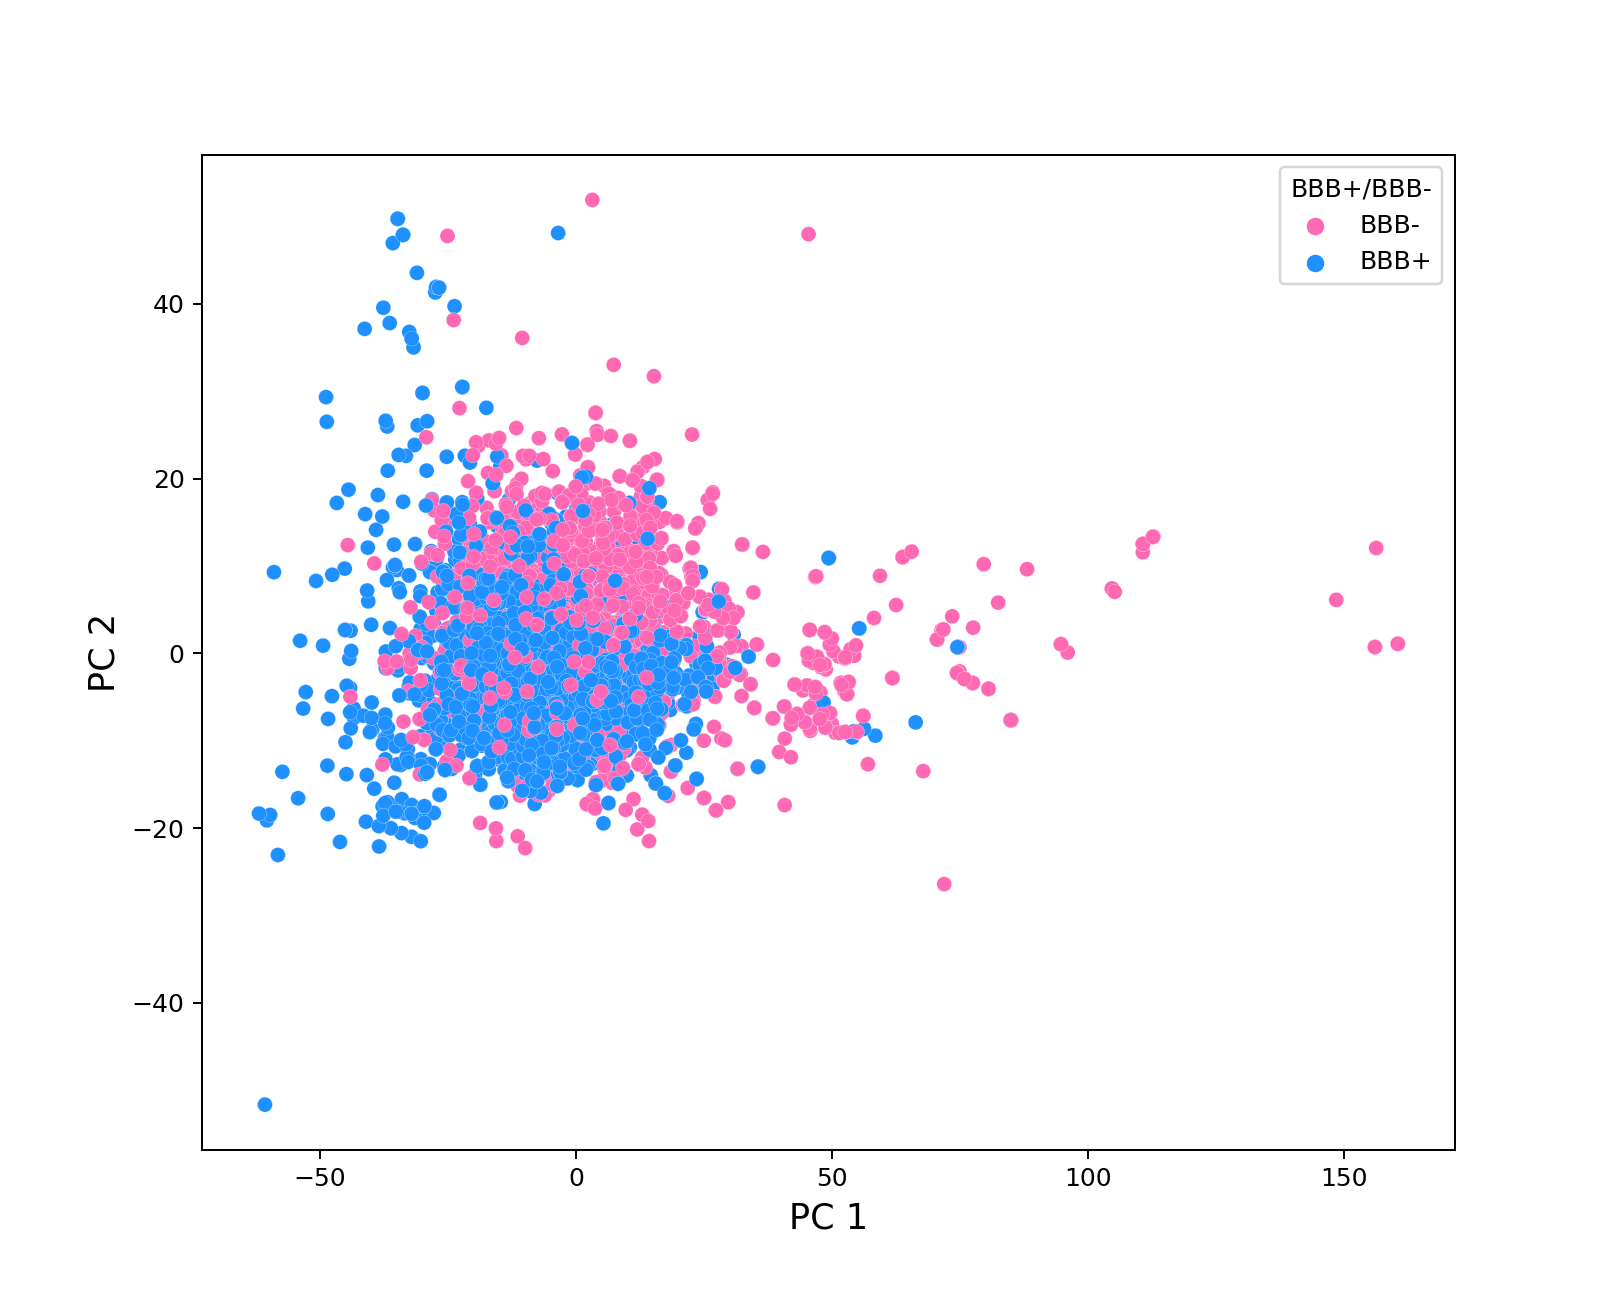

Text(0, 0.5, 'PC 2')

In [8]:
# visualization chemcial space using PCA
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))

pca = PCA(n_components=2)
arr_embedded = pca.fit_transform(arr_descriptors)
df["PC_1"] = arr_embedded[:, 0]
df["PC_2"] = arr_embedded[:, 1]

sns.scatterplot(data=df, x="PC_1", y="PC_2",
                hue="BBB+/BBB-",
                palette=sns.color_palette(["hotpink", "dodgerblue"]),
                linewidth=0.1,
                )
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
# plt.savefig("pca_projection_descriptors.png", dpi=300)